## Load Libraries

In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols


## Load the Data `Toyoto_Corrola.csv`

In [2]:
data = pd.read_csv('Toyoto_Corrola.csv')
data.head()

,Id,Model,Price,Age_08_04,KM,HP,Doors,Cylinders,Gears,Weight
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,46986,90,3,4,5,1165
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,72937,90,3,4,5,1165
2,3,ÊTOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,41711,90,3,4,5,1165
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,48000,90,3,4,5,1165
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,38500,90,3,4,5,1170


In [3]:
#drop Id & Model columns

data.drop(['Id','Model'], axis=1, inplace=True)
data.head()

,Price,Age_08_04,KM,HP,Doors,Cylinders,Gears,Weight
0,13500,23,46986,90,3,4,5,1165
1,13750,23,72937,90,3,4,5,1165
2,13950,24,41711,90,3,4,5,1165
3,14950,26,48000,90,3,4,5,1165
4,13750,30,38500,90,3,4,5,1170


In [4]:
# rename Age column

data=data.rename({'Age_08_04':'Age',},axis=1)
data.head()

,Price,Age,KM,HP,Doors,Cylinders,Gears,Weight
0,13500,23,46986,90,3,4,5,1165
1,13750,23,72937,90,3,4,5,1165
2,13950,24,41711,90,3,4,5,1165
3,14950,26,48000,90,3,4,5,1165
4,13750,30,38500,90,3,4,5,1170


### Variables in the data 

`Price`(y) -- Offer Price in EUROs.

`Age_08_04` -- Age in months as in August 2004.

`KM` -- Accumulated Kilometers on odometer.

`HP` -- Horse Power.

`Cylinders` -- Cylinder Volume in cubic centimeters.

`Doors` -- Number of doors.

`Gears` -- Number of gear positions.

`Weight` -- Weight in Kilograms.


## Data Types of the Features

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Price      1436 non-null   int64
 1   Age        1436 non-null   int64
 2   KM         1436 non-null   int64
 3   HP         1436 non-null   int64
 4   Doors      1436 non-null   int64
 5   Cylinders  1436 non-null   int64
 6   Gears      1436 non-null   int64
 7   Weight     1436 non-null   int64
dtypes: int64(8)
memory usage: 89.9 KB


In [6]:
data['Doors'].value_counts()

Doors
5    674
3    622
4    138
2      2
Name: count, dtype: int64

In [7]:
data['Cylinders'].value_counts()

Cylinders
4    1436
Name: count, dtype: int64

In [8]:
data.drop('Cylinders', axis=1, inplace=True)


In [9]:
data['Gears'].value_counts()

Gears
5    1390
6      43
3       2
4       1
Name: count, dtype: int64

## Missing Value Check


In [10]:
data.isna().sum()

Price     0
Age       0
KM        0
HP        0
Doors     0
Gears     0
Weight    0
dtype: int64

In [11]:
data[data.duplicated()]

,Price,Age,KM,HP,Doors,Gears,Weight
113,24950,8,13253,116,5,5,1320


In [12]:
df=data.drop_duplicates().reset_index(drop=True)
df

,Price,Age,KM,HP,Doors,Gears,Weight
0,13500,23,46986,90,3,5,1165
1,13750,23,72937,90,3,5,1165
2,13950,24,41711,90,3,5,1165
3,14950,26,48000,90,3,5,1165
4,13750,30,38500,90,3,5,1170
...,...,...,...,...,...,...,...
1430,7500,69,20544,86,3,5,1025
1431,10845,72,19000,86,3,5,1015
1432,8500,71,17016,86,3,5,1015
1433,7250,70,16916,86,3,5,1015


In [13]:
df.duplicated().sum()

0

In [14]:
df.tail()

,Price,Age,KM,HP,Doors,Gears,Weight
1430,7500,69,20544,86,3,5,1025
1431,10845,72,19000,86,3,5,1015
1432,8500,71,17016,86,3,5,1015
1433,7250,70,16916,86,3,5,1015
1434,6950,76,1,110,5,5,1114


## Correlation Between Numeric Independent Features


In [15]:
# correlation matrix
corel = df.corr()
corel

,Price,Age,KM,HP,Doors,Gears,Weight
Price,1.000000,-0.876273,-0.569420,0.314134,0.183604,0.063831,0.575869
Age,-0.876273,1.000000,0.504575,-0.155293,-0.146929,-0.005629,-0.466484
KM,-0.569420,0.504575,1.000000,-0.332904,-0.035193,0.014890,-0.023969
HP,0.314134,-0.155293,-0.332904,1.000000,0.091803,0.209642,0.087143
Doors,0.183604,-0.146929,-0.035193,0.091803,1.000000,-0.160101,0.301734
Gears,0.063831,-0.005629,0.014890,0.209642,-0.160101,1.000000,0.021238
Weight,0.575869,-0.466484,-0.023969,0.087143,0.301734,0.021238,1.000000


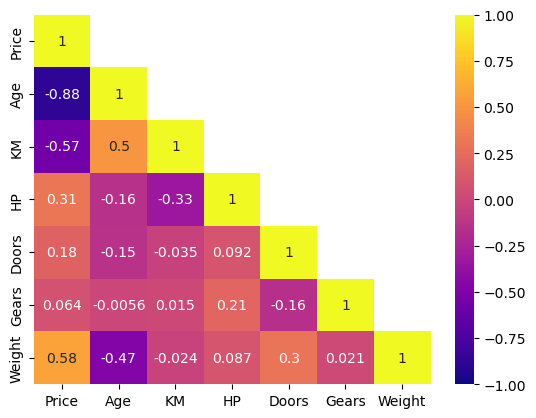

In [16]:
# visualize correlation matrix in Seaborn using a heatmap
sns.heatmap(corel, 
            annot=True,
            mask=np.triu(corel,1),
            vmin=-1,
            vmax=1,
            cmap='plasma');

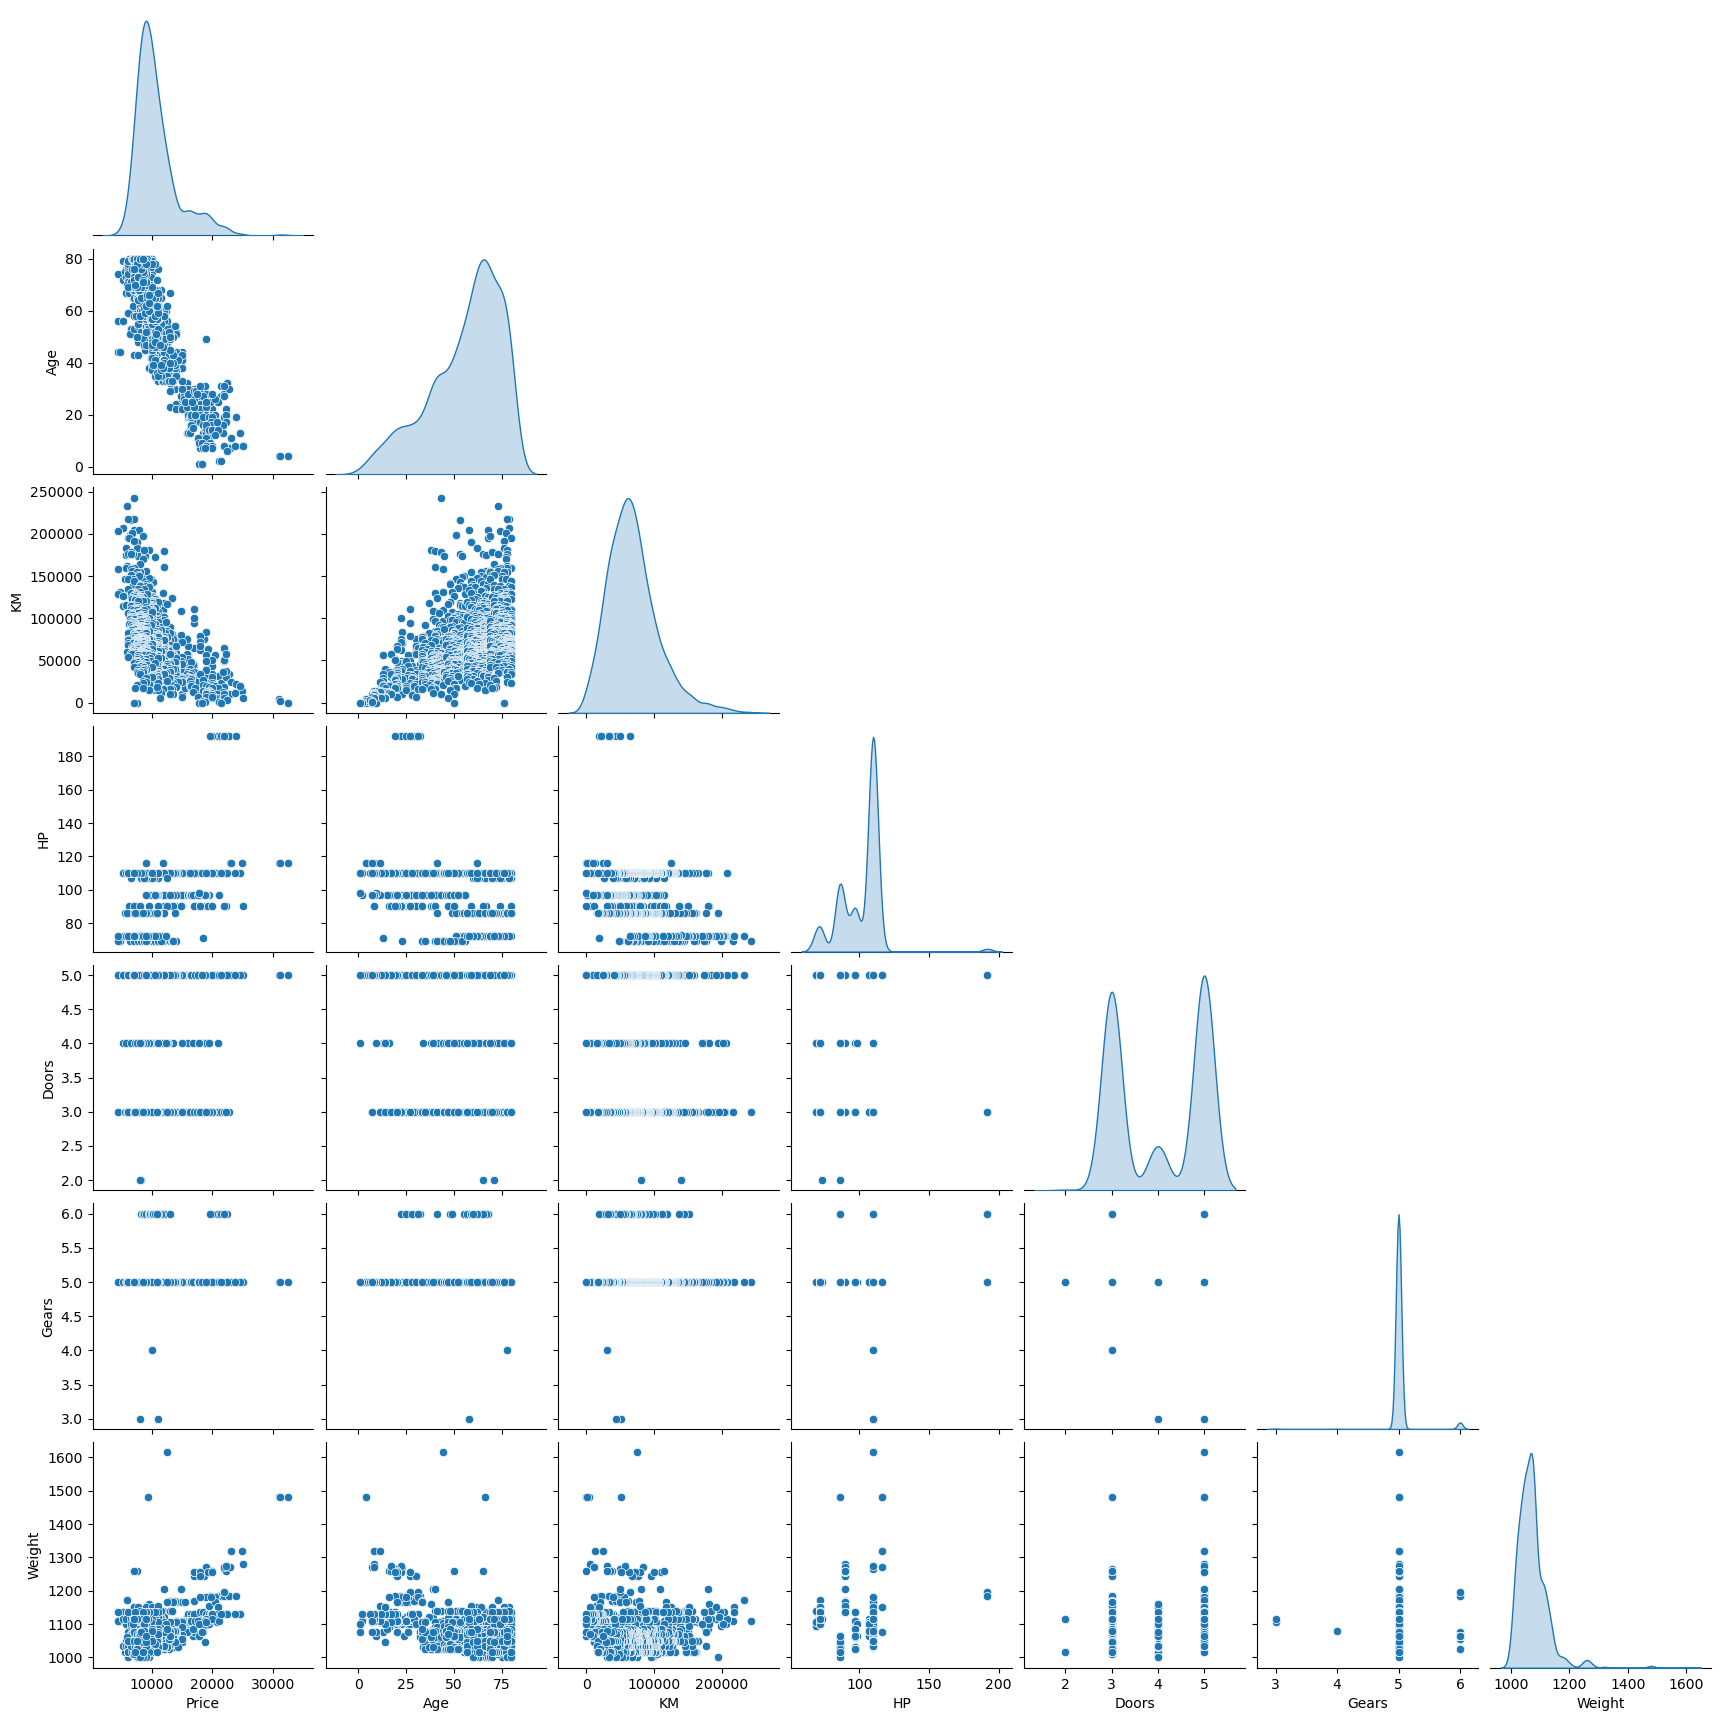

In [17]:
# pairplot
sns.pairplot(df,
            corner=True,
            diag_kind='kde');

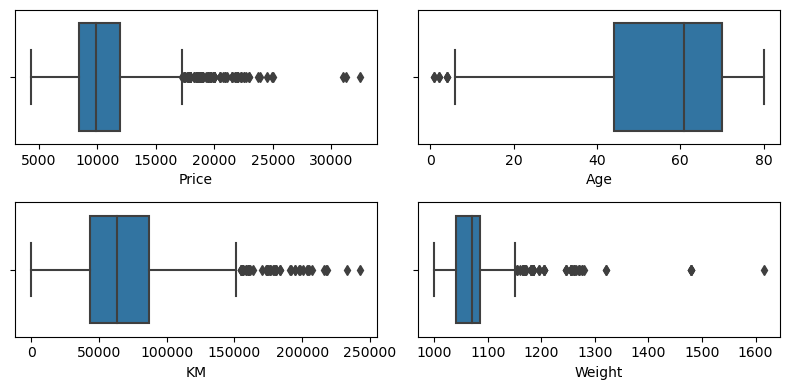

In [18]:
fig,axes = plt.subplots(nrows=2,ncols=2,figsize=(8,4))
sns.boxplot(x=df['Price'],ax=axes[0][0]) # boxplot
sns.boxplot(x=df['Age'],ax=axes[0][1]) # boxplot
sns.boxplot(x=df['KM'],ax=axes[1][0]) # boxplot
sns.boxplot(x=df['Weight'],ax=axes[1][1]) # boxplot 
plt.tight_layout();

## 6. <a id='toc6_'></a>[Outlier Treatment](#toc0_)


3500.0


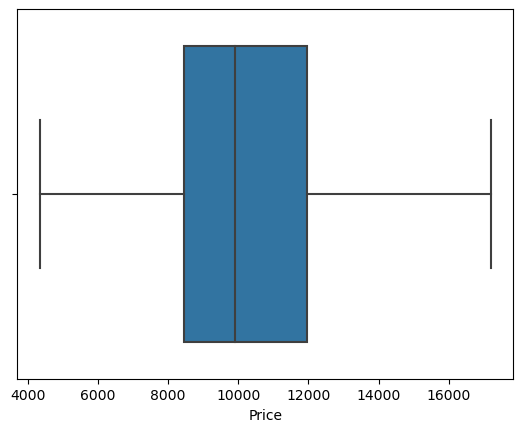

In [19]:
# calculate IQR
q3,q1 = df['Price'].quantile([0.75,0.25]) # 75th and 25th percentile
iqr = q3 - q1 # interquartile range
print(iqr)

# calculate Upper Bound and Lower Bound values
ub =  q3 + 1.5*iqr # upper bound
lb =  q1 - 1.5*iqr # lower bound

# cap and flooring the outliers
df['Price'] = np.where( df['Price'] > ub, # condition to be checked
                       ub, # value to be returned if condition is true
                       df['Price']) # value to be returned if cond is false
df['Price'] = np.where( df['Price'] < lb, # condition to be checked
                       lb, # value to be returned if condition is true
                       df['Price']) # value to be returned if cond is false

sns.boxplot(data=df, x='Price');

26.0


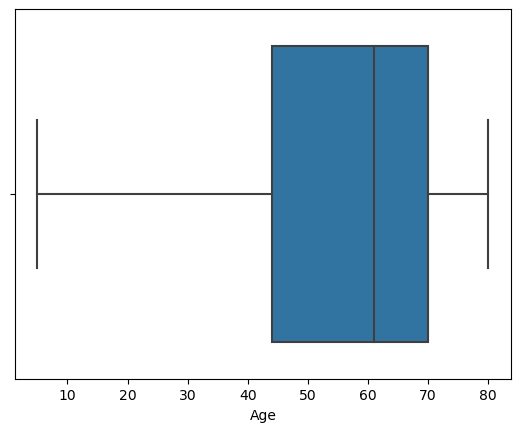

In [20]:
# calculate IQR
q3,q1 = df['Age'].quantile([0.75,0.25]) # 75th and 25th percentile
iqr = q3 - q1 # interquartile range
print(iqr)

# calculate Upper Bound and Lower Bound values
ub =  q3 + 1.5*iqr # upper bound
lb =  q1 - 1.5*iqr # lower bound

# cap and flooring the outliers
df['Age'] = np.where( df['Age'] > ub, # condition to be checked
                       ub, # value to be returned if condition is true
                       df['Age']) # value to be returned if cond is false
df['Age'] = np.where( df['Age'] < lb, # condition to be checked
                       lb, # value to be returned if condition is true
                       df['Age']) # value to be returned if cond is false

sns.boxplot(data=df, x='Age');

44041.5


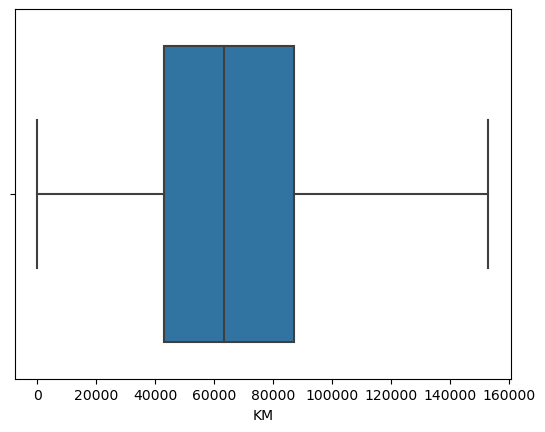

In [21]:
# calculate IQR
q3,q1 = df['KM'].quantile([0.75,0.25]) # 75th and 25th percentile
iqr = q3 - q1 # interquartile range
print(iqr)

# calculate Upper Bound and Lower Bound values
ub =  q3 + 1.5*iqr # upper bound
lb =  q1 - 1.5*iqr # lower bound

# cap and flooring the outliers
df['KM'] = np.where( df['KM'] > ub, # condition to be checked
                       ub, # value to be returned if condition is true
                       df['KM']) # value to be returned if cond is false
df['KM'] = np.where( df['KM'] < lb, # condition to be checked
                       lb, # value to be returned if condition is true
                       df['KM']) # value to be returned if cond is false

sns.boxplot(data=df, x='KM');

20.0


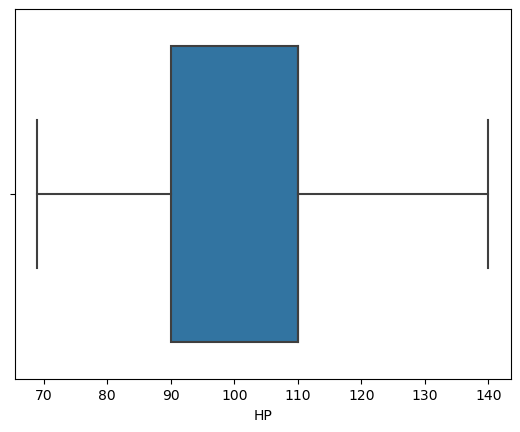

In [22]:
# calculate IQR
q3,q1 = df['HP'].quantile([0.75,0.25]) # 75th and 25th percentile
iqr = q3 - q1 # interquartile range
print(iqr)

# calculate Upper Bound and Lower Bound values
ub =  q3 + 1.5*iqr # upper bound
lb =  q1 - 1.5*iqr # lower bound

# cap and flooring the outliers
df['HP'] = np.where( df['HP'] > ub, # condition to be checked
                       ub, # value to be returned if condition is true
                       df['HP']) # value to be returned if cond is false
df['HP'] = np.where( df['HP'] < lb, # condition to be checked
                       lb, # value to be returned if condition is true
                       df['HP']) # value to be returned if cond is false

sns.boxplot(data=df, x='HP');

45.0


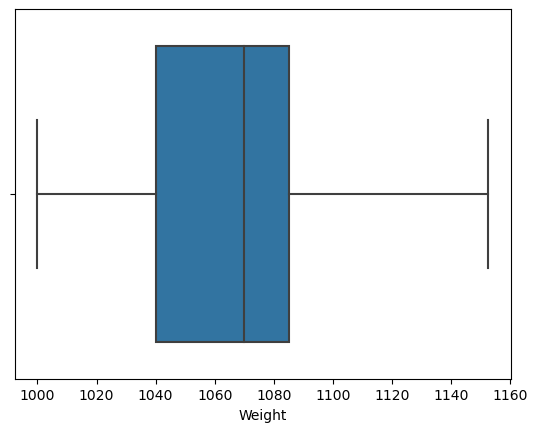

In [23]:
# calculate IQR
q3,q1 = df['Weight'].quantile([0.75,0.25]) # 75th and 25th percentile
iqr = q3 - q1 # interquartile range
print(iqr)

# calculate Upper Bound and Lower Bound values
ub =  q3 + 1.5*iqr # upper bound
lb =  q1 - 1.5*iqr # lower bound

# cap and flooring the outliers
df['Weight'] = np.where( df['Weight'] > ub, # condition to be checked
                       ub, # value to be returned if condition is true
                       df['Weight']) # value to be returned if cond is false
df['Weight'] = np.where( df['Weight'] < lb, # condition to be checked
                       lb, # value to be returned if condition is true
                       df['Weight']) # value to be returned if cond is false

sns.boxplot(data=df, x='Weight');

## Model Building


In [24]:
model=smf.ols('Price ~ Age + KM + HP + Doors + Gears + Weight',data=df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.859
Model:                            OLS   Adj. R-squared:                  0.858
Method:                 Least Squares   F-statistic:                     1449.
Date:                Thu, 05 Oct 2023   Prob (F-statistic):               0.00
Time:                        16:56:43   Log-Likelihood:                -12109.
No. Observations:                1435   AIC:                         2.423e+04
Df Residuals:                    1428   BIC:                         2.427e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -2233.9735   1327.091     -1.683      0.0

In [33]:
# Age vs Price
formula = 'Price ~ Age'
sl_Age = ols(formula=formula, data=df).fit()
print(sl_vol.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.258
Model:                            OLS   Adj. R-squared:                  0.257
Method:                 Least Squares   F-statistic:                     498.0
Date:                Thu, 05 Oct 2023   Prob (F-statistic):           6.46e-95
Time:                        16:59:12   Log-Likelihood:                -13300.
No. Observations:                1435   AIC:                         2.660e+04
Df Residuals:                    1433   BIC:                         2.661e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -3.234e+04   1920.566    -16.836      0.0

In [34]:
# KM vs Price
formula = 'Price ~ KM'
sl_KM = ols(formula=formula, data=df).fit()
print(sl_vol.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.258
Model:                            OLS   Adj. R-squared:                  0.257
Method:                 Least Squares   F-statistic:                     498.0
Date:                Thu, 05 Oct 2023   Prob (F-statistic):           6.46e-95
Time:                        16:59:12   Log-Likelihood:                -13300.
No. Observations:                1435   AIC:                         2.660e+04
Df Residuals:                    1433   BIC:                         2.661e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -3.234e+04   1920.566    -16.836      0.0

In [35]:
# HP vs Price
formula = 'Price ~ HP'
sl_HP = ols(formula=formula, data=df).fit()
print(sl_vol.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.258
Model:                            OLS   Adj. R-squared:                  0.257
Method:                 Least Squares   F-statistic:                     498.0
Date:                Thu, 05 Oct 2023   Prob (F-statistic):           6.46e-95
Time:                        16:59:13   Log-Likelihood:                -13300.
No. Observations:                1435   AIC:                         2.660e+04
Df Residuals:                    1433   BIC:                         2.661e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -3.234e+04   1920.566    -16.836      0.0

In [36]:
# Doors vs Price
formula = 'Price ~ Doors'
sl_Doors = ols(formula=formula, data=df).fit()
print(sl_vol.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.258
Model:                            OLS   Adj. R-squared:                  0.257
Method:                 Least Squares   F-statistic:                     498.0
Date:                Thu, 05 Oct 2023   Prob (F-statistic):           6.46e-95
Time:                        16:59:13   Log-Likelihood:                -13300.
No. Observations:                1435   AIC:                         2.660e+04
Df Residuals:                    1433   BIC:                         2.661e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -3.234e+04   1920.566    -16.836      0.0

In [37]:
# Gears vs Price
formula = 'Price ~ Gears'
sl_Gears = ols(formula=formula, data=df).fit()
print(sl_vol.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.258
Model:                            OLS   Adj. R-squared:                  0.257
Method:                 Least Squares   F-statistic:                     498.0
Date:                Thu, 05 Oct 2023   Prob (F-statistic):           6.46e-95
Time:                        16:59:13   Log-Likelihood:                -13300.
No. Observations:                1435   AIC:                         2.660e+04
Df Residuals:                    1433   BIC:                         2.661e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -3.234e+04   1920.566    -16.836      0.0

In [38]:
# Weight vs Price
formula = 'Price ~ Weight'
sl_Weight = ols(formula=formula, data=df).fit()
print(sl_vol.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.258
Model:                            OLS   Adj. R-squared:                  0.257
Method:                 Least Squares   F-statistic:                     498.0
Date:                Thu, 05 Oct 2023   Prob (F-statistic):           6.46e-95
Time:                        16:59:13   Log-Likelihood:                -13300.
No. Observations:                1435   AIC:                         2.660e+04
Df Residuals:                    1433   BIC:                         2.661e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -3.234e+04   1920.566    -16.836      0.0

In [39]:
# calculate VIF for each independent variable to check for multi-collinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['VIF Factor'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
vif['features'] = df.columns
vif.round(1)

,VIF Factor,features
0,95.0,Price
1,50.3,Age
2,9.5,KM
3,73.8,HP
4,23.3,Doors
5,544.5,Gears
6,703.9,Weight


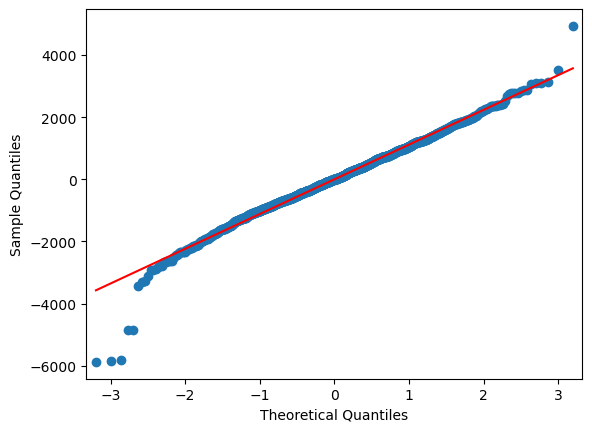

In [40]:
# check for the normality of the residuals - qqplot
from statsmodels.api import qqplot
qqplot(model.resid, line='s');

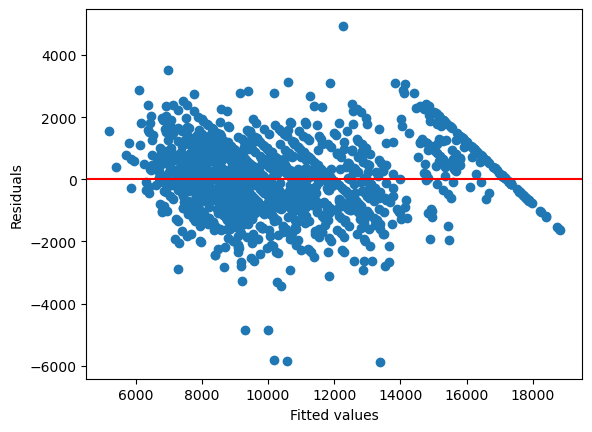

In [41]:
# check for homoscedasticity - residuals vs fitted values
plt.scatter(model.fittedvalues, model.resid) # fitted values = predictions, residuals = errors
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.axhline(y=0, color='r', linestyle='-');

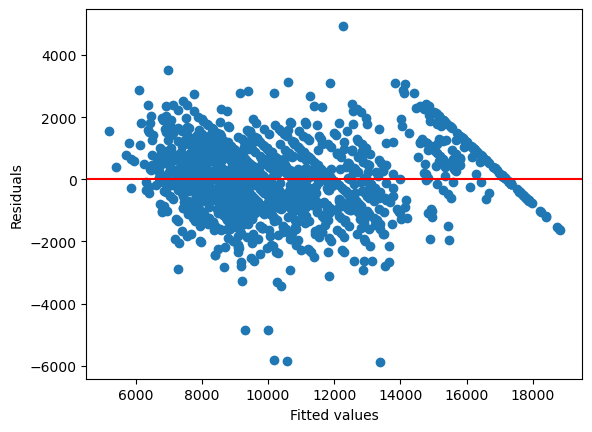

In [42]:
# check for homoscedasticity - residuals vs fitted values
plt.scatter(model.fittedvalues, model.resid) # fitted values = predictions, residuals = errors
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.axhline(y=0, color='r', linestyle='-');

In [43]:
# Observation deletion diagnostics - detect influential observations
# get cook's distance
model_influence = model.get_influence()
model_influence.cooks_distance

(array([3.67609561e-03, 1.41515147e-03, 2.19057447e-03, ...,
        4.61937484e-05, 2.09252018e-03, 2.03061847e-02]),
 array([0.99999998, 1.        , 1.        , ..., 1.        , 1.        ,
        0.99999217]))

In [44]:
(c,_) = model_influence.cooks_distance
c

array([3.67609561e-03, 1.41515147e-03, 2.19057447e-03, ...,
       4.61937484e-05, 2.09252018e-03, 2.03061847e-02])

In [46]:
#  greater than 4/no of observations
4/df.shape[0] # 0.05

0.0027874564459930314

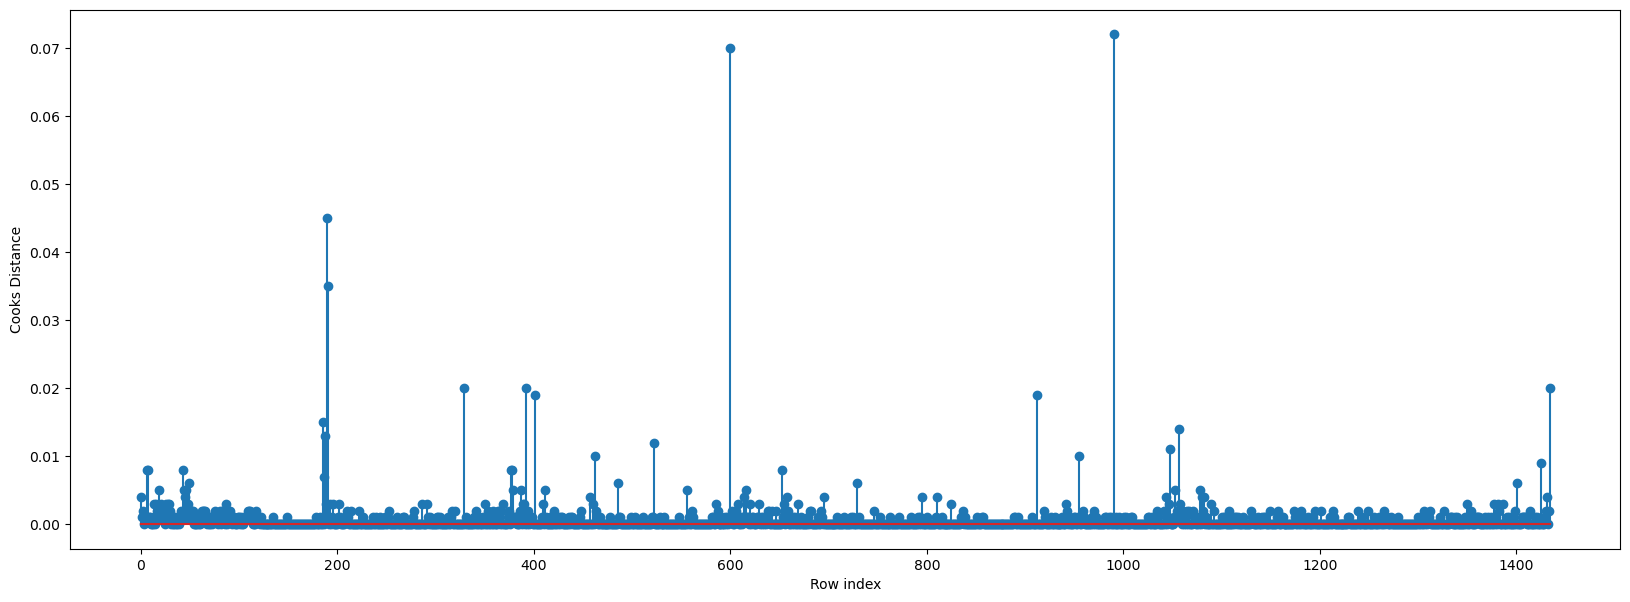

In [48]:
# plot the influencers values using stem plot
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(df)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance');

In [49]:
# check which data points are influencers
cgreater = c>0.05
cgreater.sum()


2

In [50]:
# get the index of elements of cgreater where cgreater is True
idx_drop = np.where(cgreater)
idx_drop

(array([600, 990]),)

In [51]:
idx_drop[0]

array([600, 990])

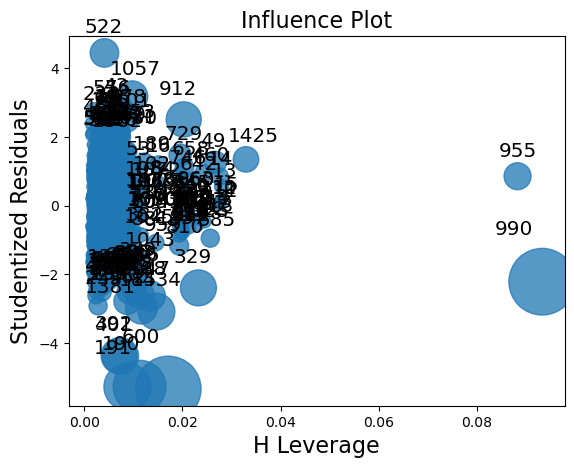

In [52]:
# influence plot
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model);

In [62]:
new_data=pd.DataFrame({'Age':12,"KM":40000,"HP":80,"Doors":4,"Gears":5,"Weight":1012},index=[0])
new_data

,Age,KM,HP,Doors,Gears,Weight
0,12,40000,80,4,5,1012


In [59]:
model.predict(new_data) 

0    14622.506661
dtype: float64

In [57]:
df.head()

,Price,Age,KM,HP,Doors,Gears,Weight
0,13500.0,23.0,46986.0,90.0,3,5,1152.5
1,13750.0,23.0,72937.0,90.0,3,5,1152.5
2,13950.0,24.0,41711.0,90.0,3,5,1152.5
3,14950.0,26.0,48000.0,90.0,3,5,1152.5
4,13750.0,30.0,38500.0,90.0,3,5,1152.5
